# #DuBoisChallenge2024 Challenge 10

This time, we're going to take an exploratory approach. We'll take some time to:
    
    1. Look at the original
    2. Set up a visualisation grid
    3. Fill out the data
    4. Apply Du Bois's  design
    
And as always, we start by loading the required packages:

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from colors import dubois_colors
%matplotlib notebook

## 1. Look at the original

The original design has a lot of things going on ([view it here](https://github.com/ajstarks/dubois-data-portraits/blob/master/challenge/2024/challenge10/original-plate-37.jpg)).

Technically, it can be broken down into:

- Titles
- Annotations
- Map chart
- Pie chart 
- Legends

I'll set up a general layout of the plot using four plots and adjusting margins.

## 2. Data visualisation grid

First the plots, I'll use four in total: one at the top for the map and three below that for the pie and the two legends. to get there, I'll set up a 3 x 2 grid of subplots:

<IPython.core.display.Javascript object>


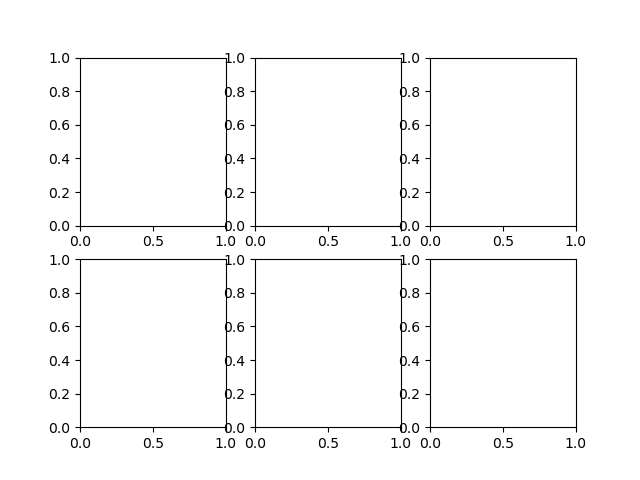

In [68]:
fig = plt.subplots(
    ncols=3,
    nrows=2, 
)

We then adjust the locations of the plots to get to the following data viz grid:

<IPython.core.display.Javascript object>


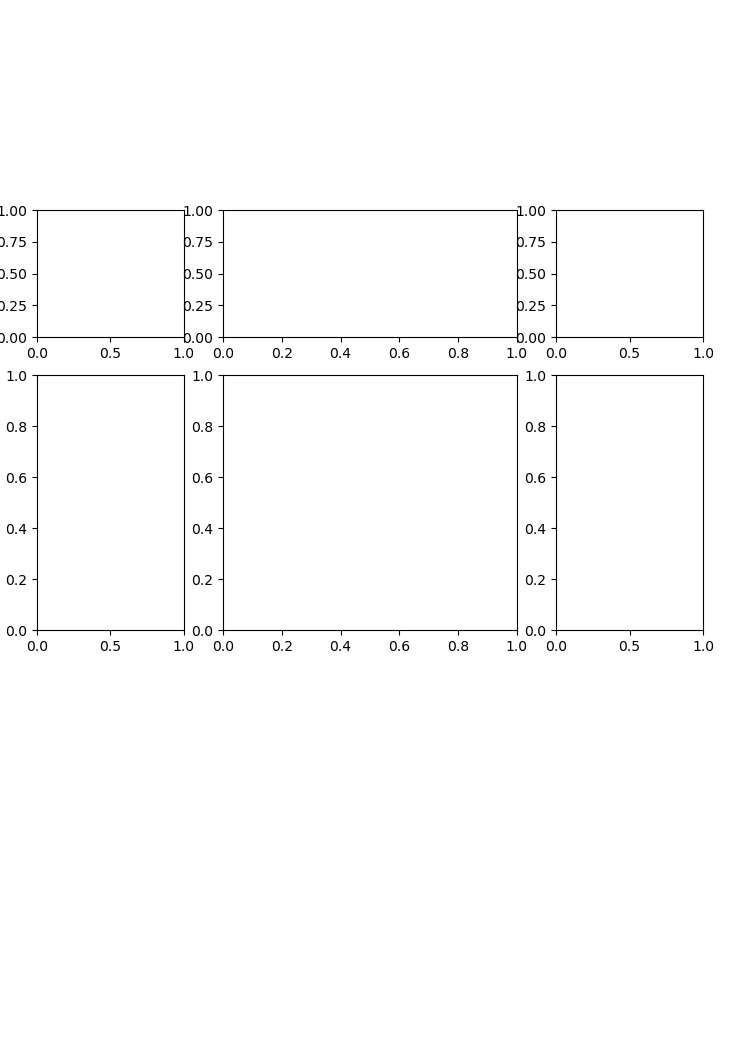

In [69]:
fig = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,2,1],
        'height_ratios': [1,2],
    }    
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

I'm not sure if this is perfect, but it's good enough for now.

Let's add some data.

## 3. Fill out the data

We start by fetching the challenge data.

In [70]:
df = pd.read_csv('2024/challenge10/data.csv')
df

,Occupation,Percentage
0,Teachers,58.5
1,Ministers,4.3
2,Government Service,3.2
3,Business,2.1
4,Other Professions,3.8
5,House Wives,28.1


Now lets add that as a piechart to the right axis:

<IPython.core.display.Javascript object>


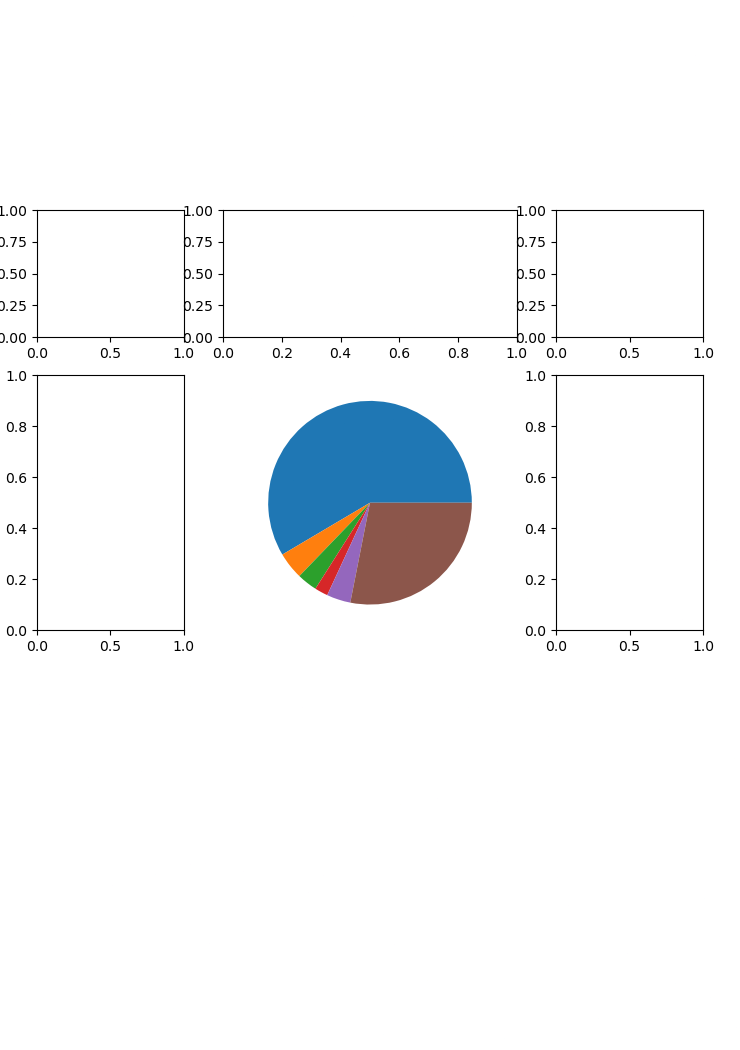

In [71]:
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,2,1],
        'height_ratios': [1,2],
    }    
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

ax_pie = axs[1][1]
ax_pie.pie(df['Percentage'])

plt.show()

The order of data is different from the original, so lets modify the use of `pie` to plot it in the right order:

<IPython.core.display.Javascript object>


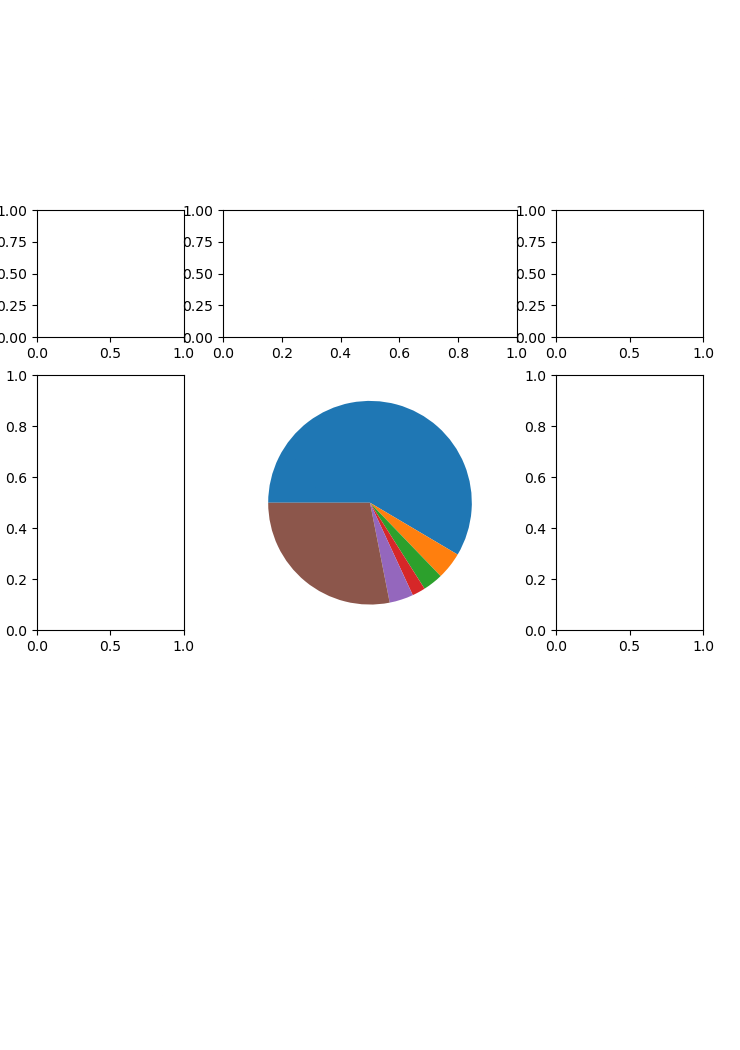

In [72]:
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,2,1],
        'height_ratios': [1,2],
    }    
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

ax_pie = axs[1][1]
ax_pie.pie(df['Percentage'], counterclock=False, startangle=-180)

plt.show()

Beautiful. 

Now we need to add the map. I've downloaded a shape file of US states ties to plot a map. 

In [73]:
import geopandas as gpd

gdf = gpd.read_file('2024/challenge10/states.zip')
gdf.head(3)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,USA.1_1,USA,UnitedStates,Alabama,AL|Ala.,NA,State,State,NA,US.AL,US-AL,"MULTIPOLYGON (((-88.12060 30.23320, -88.12330 ..."
1,USA.2_1,USA,UnitedStates,Alaska,AK|Alaska,NA,State,State,NA,US.AK,US-AK,"MULTIPOLYGON (((-179.13150 51.20970, -179.1328..."
2,USA.3_1,USA,UnitedStates,Arizona,AZ|Ariz.,NA,State,State,NA,US.AZ,US-AZ,"MULTIPOLYGON (((-110.75620 31.33290, -111.0750..."


And lets plot that data as well, using the top middle axis.

<IPython.core.display.Javascript object>


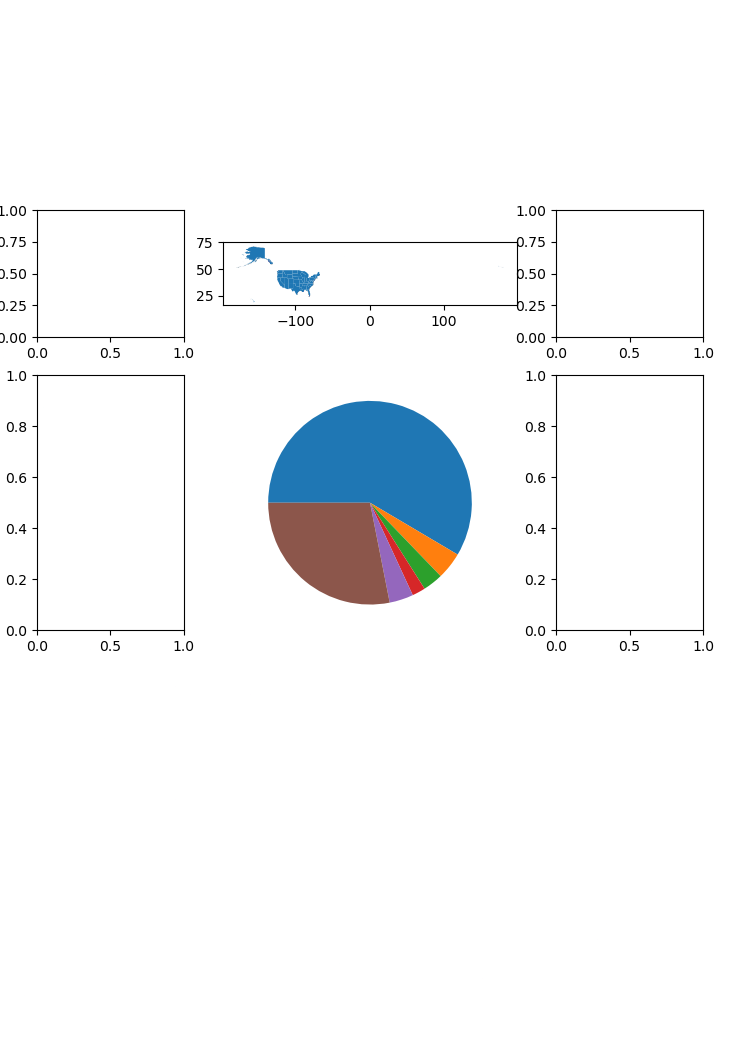

In [82]:
# overall layout
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,2,1],
        'height_ratios': [1,2],
    }    
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

# pie chart
ax_pie = axs[1][1]
ax_pie.pie(df['Percentage'], counterclock=False, startangle=-180)

# map chart
ax_map = axs[0][1]
gdf.plot(ax=ax_map)

plt.show()

Alaska and Hawaii are not in the original map, so the image looks a bit off.

I'm going to drop those from the map data (sorry Alaska and Hawaii).

In [83]:
gdf = gdf.query('NAME_1 not in ["Alaska", "Hawaii"]')

Now let's try again:

<IPython.core.display.Javascript object>


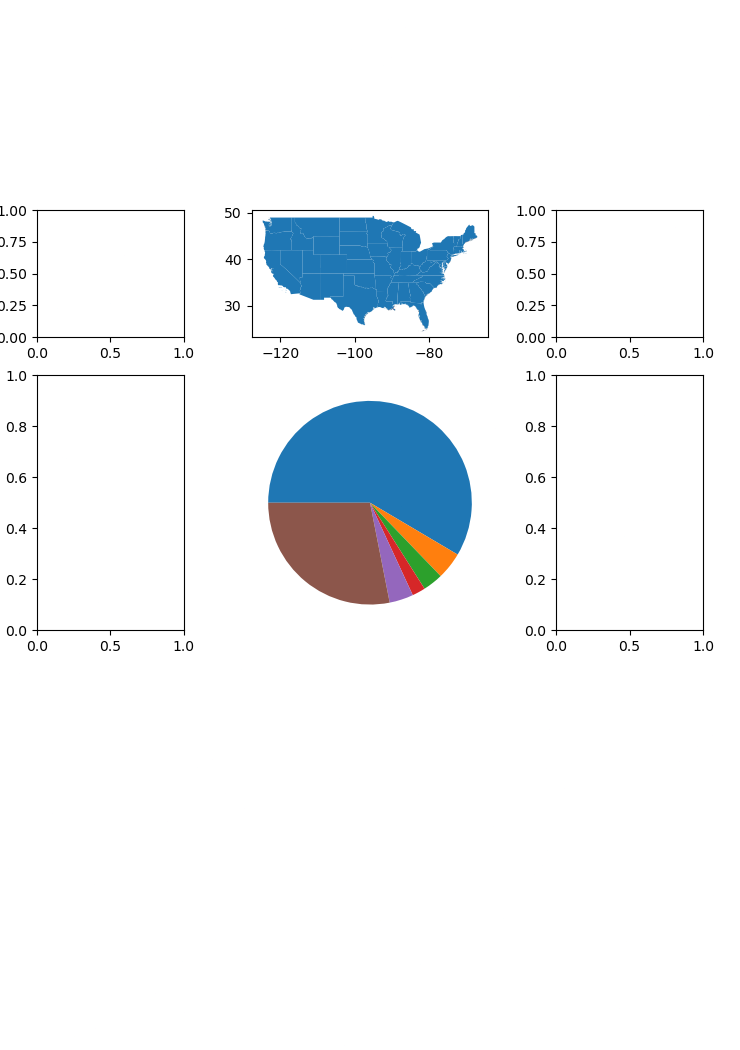

In [84]:
# overall layout
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,2,1],
        'height_ratios': [1,2],
    }    
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

# pie chart
ax_pie = axs[1][1]
ax_pie.pie(df['Percentage'], counterclock=False, startangle=-180)

# map chart
ax_map = axs[0][1]
gdf.plot(ax=ax_map)

plt.show()

Nice. Now we have something that resembles the original. And 'all there is left to do' is add Du Bois's design, data labels, and titles. (A lot of labels.)

## 4. Apply Du Bois's Design

Let's have a go with the colours first. We'll add a colour map to the pie chart data:

In [85]:
df['colors'] = [
    dubois_colors.get('crimson'),
    dubois_colors.get('blue'),
    dubois_colors.get('pink'),
    dubois_colors.get('tan'),
    '#777777',
    dubois_colors.get('gold'),
]

df

,Occupation,Percentage,colors
0,Teachers,58.5,#dc143c
1,Ministers,4.3,#4682b4
2,Government Service,3.2,#ffc0cb
3,Business,2.1,#d2b48c
4,Other Professions,3.8,#777777
5,House Wives,28.1,#ffd700


Now let's use that data for the pie chart:

<IPython.core.display.Javascript object>


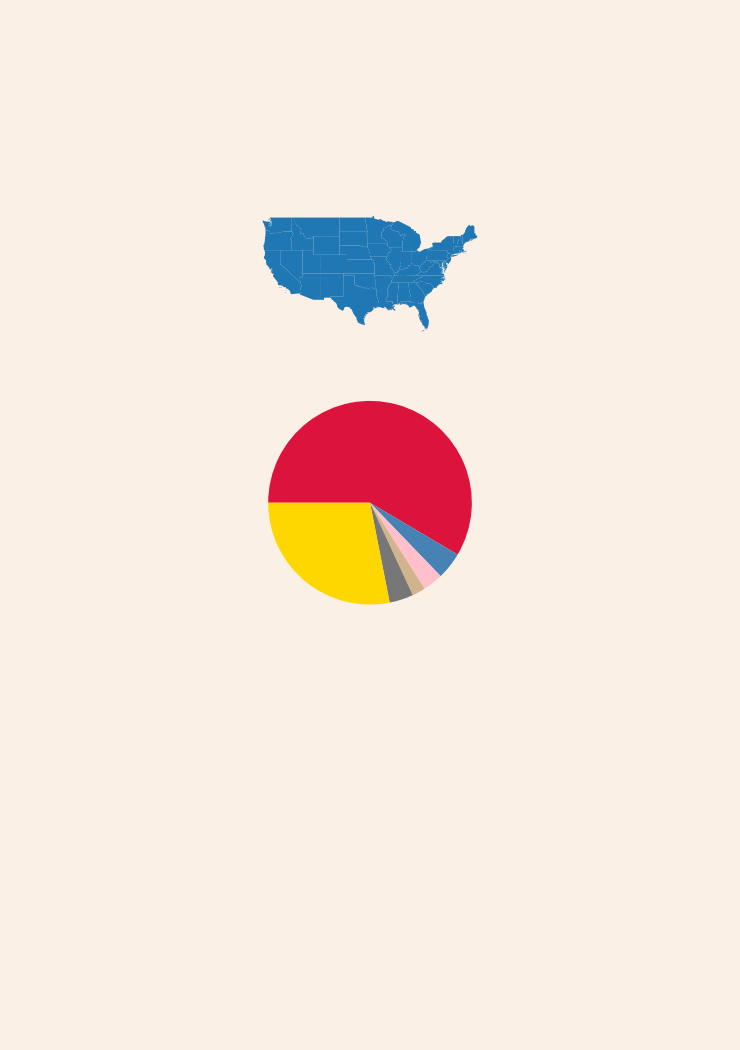

In [86]:
# overall layout
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,2,1],
        'height_ratios': [1,2],
    },
    facecolor=dubois_colors.get('bg')
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

# turn off axes
for row in axs:
    for ax in row:
        ax.axis('off')

# pie chart
ax_pie = axs[1][1]
ax_pie.pie(df['Percentage'], colors=df['colors'], counterclock=False, startangle=-180)

# map chart
ax_map = axs[0][1]
gdf.plot(ax=ax_map)

plt.show()

I like the pie chart to be a bit bigger (I modify the `radius` value for that).

In [ ]:
# overall layout
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,3,1],
        'height_ratios': [1,2],
#         'wspace': -1,
        'hspace': .8
    },
    facecolor=dubois_colors.get('bg')
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

# turn off axes
for row in axs:
    for ax in row:
        ax.axis('off')

# pie chart
ax_pie = axs[1][1]
ax_pie.pie(df['Percentage'], colors=df['colors'], counterclock=False, startangle=-180, radius=1.7)

# map chart
ax_map = axs[0][1]
gdf.plot(ax=ax_map)

plt.show()

Alright, now lets add the legends. I need the French data labels as well, I'll add those to the data:

In [91]:
df['Occupation_fr'] = [
    'PROFFESSEURS ET INSTITUTEURS',
    'MINISTRES DE L\'EVANGILE',
    'EMPLOYÉS DU GOUVERNMENT',
    'MARCHANDS',
    'MEDONS, ADVOCATS, ET ÉTUDANTS',
    'MÈRES DE FAMILIE'
]
df

,Occupation,Percentage,colors,Occupation_fr
0,Teachers,58.5,#dc143c,PROFFESSEURS ET INSTITUTEURS
1,Ministers,4.3,#4682b4,MINISTRES DE L'EVANGILE
2,Government Service,3.2,#ffc0cb,EMPLOYÉS DU GOUVERNMENT
3,Business,2.1,#d2b48c,MARCHANDS
4,Other Professions,3.8,#777777,"MEDONS, ADVOCATS, ET ÉTUDANTS"
5,House Wives,28.1,#ffd700,MÈRES DE FAMILIE


I'll use the bottom left and right axes to plot the labels.

<IPython.core.display.Javascript object>


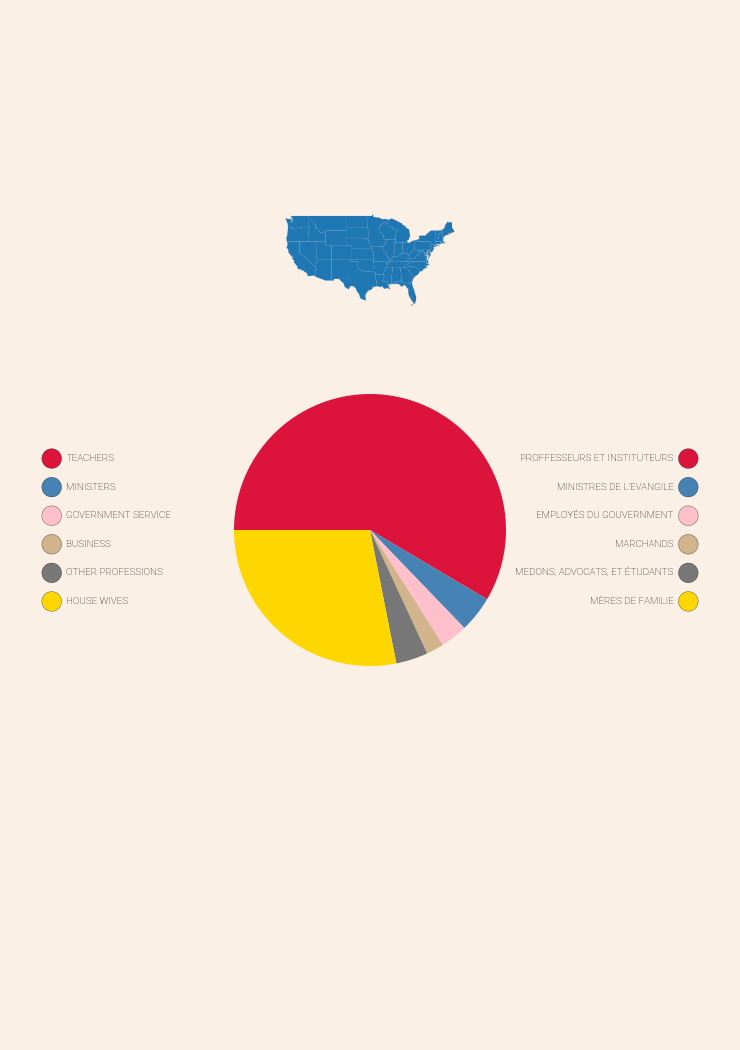

In [92]:
# overall layout
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,3,1],
        'height_ratios': [1,2],
        'hspace': .8
    },
    facecolor=dubois_colors.get('bg')
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

# turn off axes
for row in axs:
    for ax in row:
        ax.axis('off')

# pie chart
ax_pie = axs[1][1]
ax_pie.pie(df['Percentage'], colors=df['colors'], counterclock=False, startangle=-180, radius=1.7)

# map chart
ax_map = axs[0][1]
gdf.plot(ax=ax_map)

# plot legends using scatter plots:
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light', 'fontsize': 7}

ax_left = axs[1][0]
ax_right = axs[1][2]

for index, value in enumerate(df['Occupation']):
    ha = 'left'
        
    ax_left.text(
        x=1,
        y=index,
        s=value.upper(),
        va='center',
        ha=ha,
        **rob_font_light
    )
    
    # french
    ha = 'right'
    
    ax_right.text(
        x=5,
        y=index,
        s=df['Occupation_fr'][index].upper(),
        va='center',
        ha=ha,
        **rob_font_light
    )

ax_left.scatter([0,0,0,0,0,0], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_left.set_ylim(6,-1)
ax_left.set_xlim(-1, 7)

ax_right.scatter([6,6,6,6,6,6], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_right.set_ylim(6,-1)
ax_right.set_xlim(-1, 7)
    

plt.show()

Time to add the data labels to the pie:

<IPython.core.display.Javascript object>


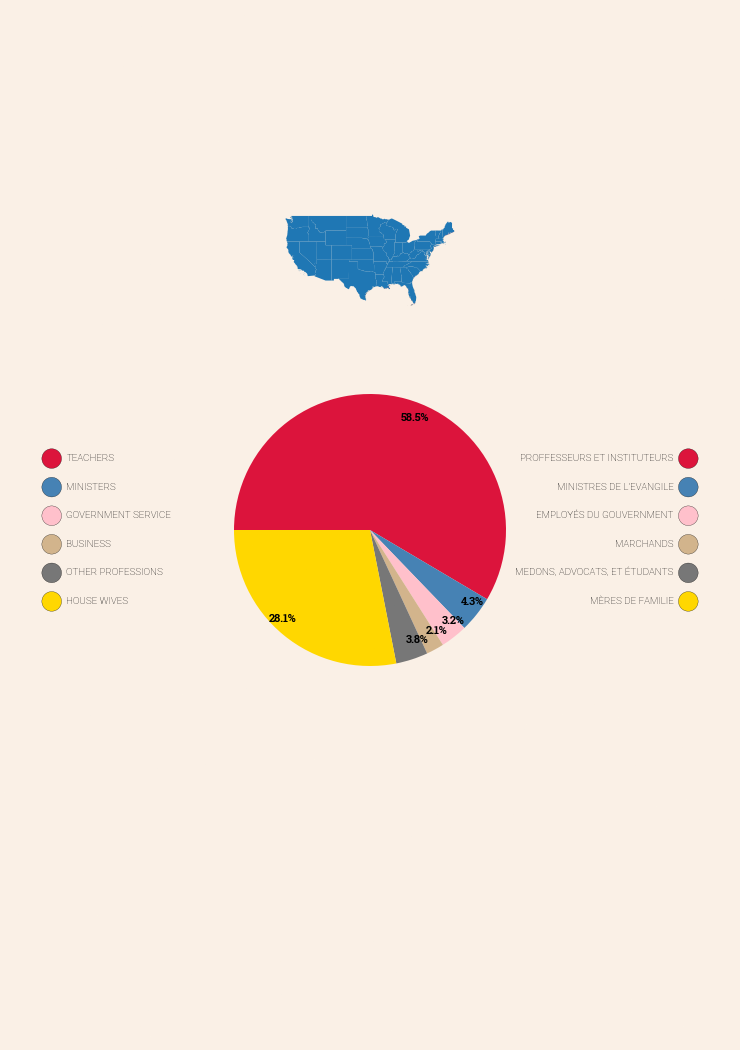

In [93]:
# overall layout
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,3,1],
        'height_ratios': [1,2],
#         'wspace': -1,
        'hspace': .8
    },
    facecolor=dubois_colors.get('bg')
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

# turn off axes
for row in axs:
    for ax in row:
        ax.axis('off')

# pie chart
pie_labels = []

for percentage in df['Percentage']:
    pie_labels.append(f'{str(percentage)}%')
    
ax_pie = axs[1][1]
ax_pie.pie(
    df['Percentage'], colors=df['colors'], counterclock=False, startangle=-180, radius=1.7, 
    labels=pie_labels,
    labeldistance=.85,
    textprops={
        'fontname': 'Roboto Slab',
        'fontweight': 'bold',
        'fontsize': 8,
    }
)


# map chart
ax_map = axs[0][1]
gdf.plot(ax=ax_map)

# plot legends using scatter plots:
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light', 'fontsize': 7}

ax_left = axs[1][0]
ax_right = axs[1][2]

for index, value in enumerate(df['Occupation']):
    ha = 'left'
        
    ax_left.text(
        x=1,
        y=index,
        s=value.upper(),
        va='center',
        ha=ha,
        **rob_font_light
    )
    
    # french
    ha = 'right'
    
    ax_right.text(
        x=5,
        y=index,
        s=df['Occupation_fr'][index].upper(),
        va='center',
        ha=ha,
        **rob_font_light
    )

ax_left.scatter([0,0,0,0,0,0], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_left.set_ylim(6,-1)
ax_left.set_xlim(-1, 7)

ax_right.scatter([6,6,6,6,6,6], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_right.set_ylim(6,-1)
ax_right.set_xlim(-1, 7)
    

plt.show()

The labels are not perfect, but I'm okay with that.

Now on to the map colours. There does not seem to be a relationship to data here (the map has more colours than the pie chart). So to add some colors to the map, I'll apply randomly selected colors from Du Bois's colour list.

In [94]:
from random import randint

color_list = [
    '#000000',
    '#654321',
    '#d2b48c',
    '#ffd700',
    '#ffc0cb',
    '#dc143c',
    '#00aa00',
    '#4682b4',
    '#7e6583',
]
random_colors = []

for value in range(0, len(gdf)):
    random_index = randint(0, len(color_list)-1)
    random_colors.append(color_list[random_index])
    
gdf['colors'] = random_colors

And now we use that list of colors:

<IPython.core.display.Javascript object>


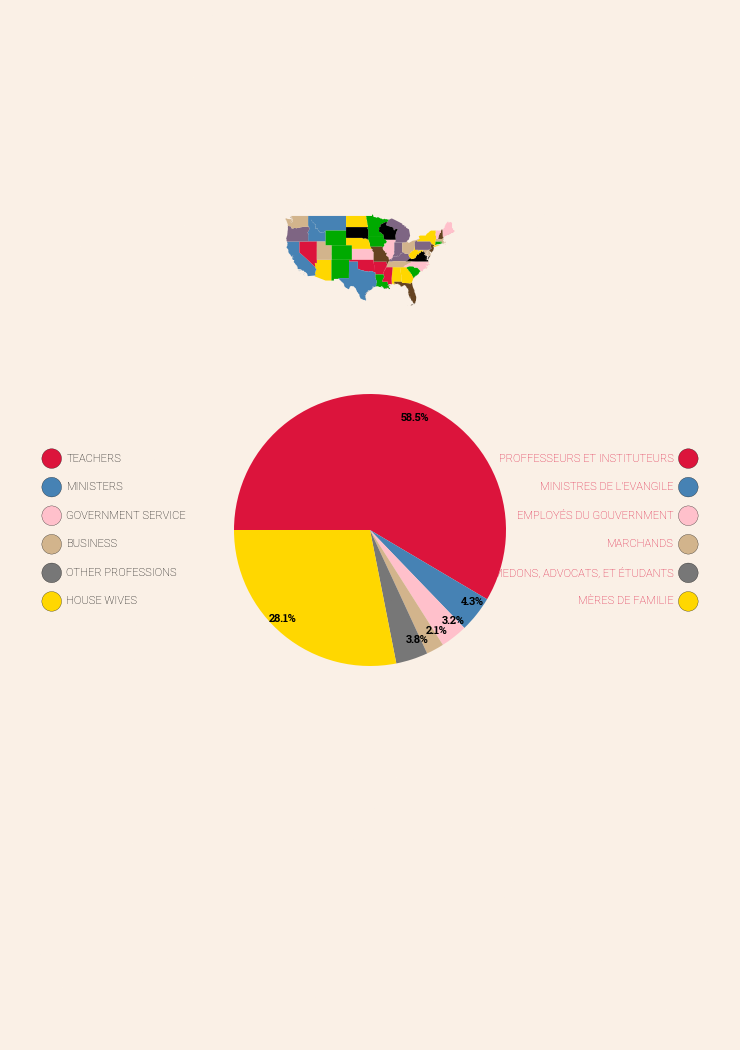

In [95]:
# overall layout
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,3,1],
        'height_ratios': [1,2],
#         'wspace': -1,
        'hspace': .8
    },
    facecolor=dubois_colors.get('bg')
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

# turn off axes
for row in axs:
    for ax in row:
        ax.axis('off')

# pie chart
pie_labels = []

for percentage in df['Percentage']:
    pie_labels.append(f'{str(percentage)}%')
    
ax_pie = axs[1][1]
ax_pie.pie(
    df['Percentage'], colors=df['colors'], counterclock=False, startangle=-180, radius=1.7, 
    labels=pie_labels,
    labeldistance=.85,
    textprops={
        'fontname': 'Roboto Slab',
        'fontweight': 'bold',
        'fontsize': 8,
    }
)


# map chart
ax_map = axs[0][1]
gdf.plot(ax=ax_map, color=gdf['colors'])

# plot legends using scatter plots:
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light', 'fontsize': 8}

ax_left = axs[1][0]
ax_right = axs[1][2]

for index, value in enumerate(df['Occupation']):
    ha = 'left'
        
    ax_left.text(
        x=1,
        y=index,
        s=value.upper(),
        va='center',
        ha=ha,
        **rob_font_light
    )
    
    # french
    ha = 'right'
    
    ax_right.text(
        x=5,
        y=index,
        s=df['Occupation_fr'][index].upper(),
        va='center',
        ha=ha,
        color=dubois_colors.get('crimson'),
        **rob_font_light
    )

ax_left.scatter([0,0,0,0,0,0], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_left.set_ylim(6,-1)
ax_left.set_xlim(-1, 7)

ax_right.scatter([6,6,6,6,6,6], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_right.set_ylim(6,-1)
ax_right.set_xlim(-1, 7)
    

plt.show()

Now all we have to do is add all the textual information!

<IPython.core.display.Javascript object>


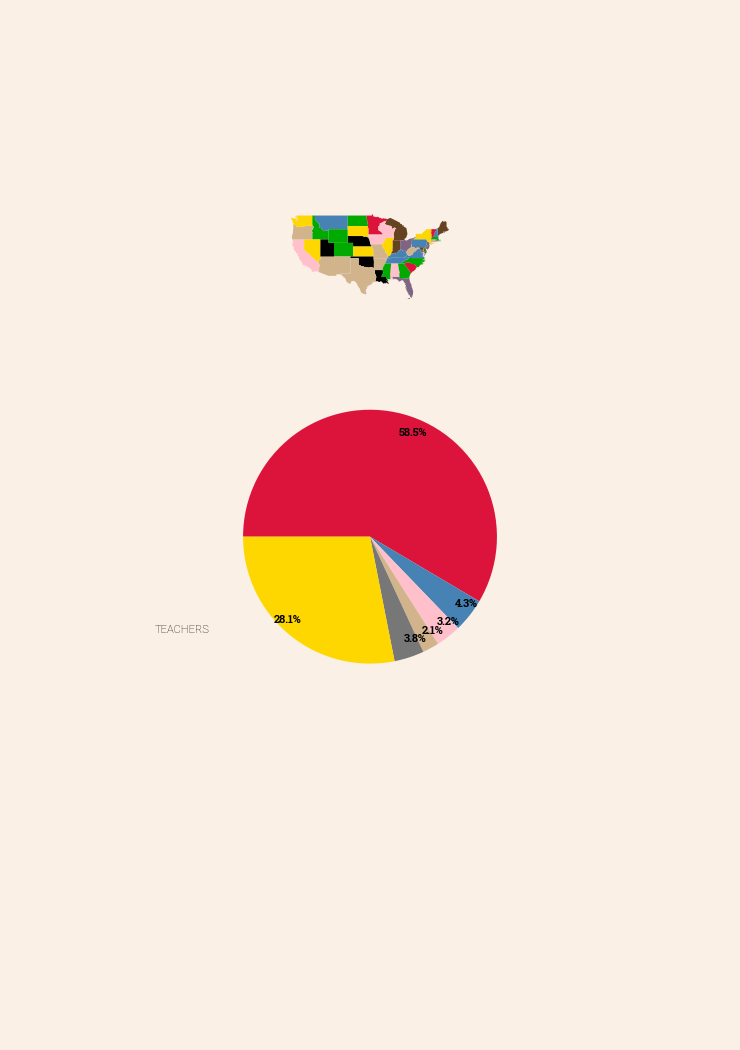

KeyError: 'Occupation_fr'

In [90]:
# overall layout
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,3,1],
        'height_ratios': [1,2],
#         'wspace': -1,
        'hspace': 1
    },
    facecolor=dubois_colors.get('bg')
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

# turn off axes
for row in axs:
    for ax in row:
        ax.axis('off')

# pie chart
pie_labels = []

for percentage in df['Percentage']:
    pie_labels.append(f'{str(percentage)}%')
    
ax_pie = axs[1][1]
ax_pie.pie(
    df['Percentage'], colors=df['colors'], counterclock=False, startangle=-180, radius=1.7, 
    labels=pie_labels,
    labeldistance=.85,
    textprops={
        'fontname': 'Roboto Slab',
        'fontweight': 'bold',
        'fontsize': 8,
    }
)


# map chart
ax_map = axs[0][1]
gdf.plot(ax=ax_map, color=gdf['colors'])

# plot legends using scatter plots:
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light', 'fontsize': 8}

ax_left = axs[1][0]
ax_right = axs[1][2]

for index, value in enumerate(df['Occupation']):
    ha = 'left'
        
    ax_left.text(
        x=1,
        y=index,
        s=value.upper(),
        va='center',
        ha=ha,
        **rob_font_light
    )
    
    # french
    ha = 'right'
    
    ax_right.text(
        x=5,
        y=index,
        s=df['Occupation_fr'][index].upper(),
        va='center',
        ha=ha,
        color=dubois_colors.get('crimson'),
        **rob_font_light
    )

ax_left.scatter([0,0,0,0,0,0], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_left.set_ylim(6,-1)
ax_left.set_xlim(-1, 7)

ax_right.scatter([6,6,6,6,6,6], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_right.set_ylim(6,-1)
ax_right.set_xlim(-1, 7)
    
plot_font_settings_black =  {
    'fontname':'Roboto', 
    'fontweight': 'bold', 
    'fontsize': 20,
    'linespacing': .9,
    'ha': 'center',
    'va': 'top',
    'color': 'black',
    'transform': fig.transFigure,
}  

plot_font_settings_light_black =  {
    'fontname':'Roboto', 
    'fontweight': 'light', 
    'linespacing': 1.1,
    'ha': 'center',
    'va': 'top',
    'color': 'black',
    'transform': fig.transFigure,
}  

plot_font_settings_light_crimson =  {
    'fontname':'Roboto', 
    'fontweight': 'light', 
    'linespacing': 1.1,
    'ha': 'center',
    'va': 'top',
    'color': dubois_colors.get('crimson'),
    'transform': fig.transFigure,
}  

plt.text(
    .5, 
    1.01,
    s='''
    A SERIES OF STATISTICAL CHARDS, ILLUSTRA-
    TING THE CONDITION OF THE DESCENDANTS OF FOR-
    MER AFRICAN SLAVES NOW RESIDENT IN THE UNITED
    STATES OF AMERICA.
    ''',
    **plot_font_settings_black
)

plt.text(
    .5, 
    .90,
    s='''
    UNE SÉRIE DE CARTES ET DIAGRAMMES STATISTIQUES MONTRANT LA
    CONDITION PRÉSENTE DES DESCANDANTS DES ANCIENS ESCLAVES AFRI-
    CAINS ACTUELLMENT ÉTABLIS DANS LES ETATS UNIS D'AMERIQUE.
    ''',
    fontsize=14,
    **plot_font_settings_light_crimson
)

plt.text(
    .2, 
    .82,
    s='''
    PREPARED AND EXECUTED BY
    NEGRO STUDENTS UNDER THE 
    DIRECTION OF
    ATLANTA UNIVERSITY.
    ATLANTA, GA.
    UNITED STATES OF AMERICA
    ''',
    fontsize=11,
    **plot_font_settings_light_black
)

plt.text(
    .80, 
    .82,
    s='''
    PRÉPARÉES ET EXECUTÉES PAR
    DES ÉTUDIANTS NÈGRES SOUS
    LA DIRECTION DE L'UNIVERSITÉ
    D'ATLANTA
    ETAT DE GÉORGIE.
    ETATS UNIS D'AMERIQUE.
    ''',
    fontsize=11,
    **plot_font_settings_light_crimson
)

plt.text(
    .5, 
    .7,
    s='''
    THE UNIVERSITY WAS FOUNED IN 1867. IT HAS INSTRUCTED 6000 NEGROE STUDENTS.
    
    IT HAS GRADUATED 330 NEGROES AMONG WHOM ARE:
    ''',
    fontsize=10,
    **plot_font_settings_light_black
)

plt.text(
    .5, 
    .685,
    s='''
    L'UNIVERSITÉ A ÉTÉ FONDÉE EN 1867. ELLE DONNÉ L'INSTRUCTION A'6000 ÉTUDIANTS NÈGRES.
    
    ELLA A DÉLIVRE DES DIPLOMES A 330 NÈGRES SONT:
    ''',
    fontsize=10,
    **plot_font_settings_light_crimson
)

plot_font_settings_light_black['ha'] = 'left'
plot_font_settings_light_crimson['ha'] = 'left'

plt.text(
    .05, 
    .3,
    s='''
        THE UNIVERSITY HAS 20 PROFESSORS AND INSTRUCTORS AND 250 STUDENTS A PRESENT.
        IT HAS FIVE BUILDINGS, 60 ACRES OF CAMPUS, AND A LIBRARY OF 11,000 VOLUMES. IT AIMS TO RAISE
    AND CIVILIZE THE SONS OF THE FREEDMEN BY TRAINING THEIR MORE CAPABLE MEMBERS IN THE LIBER-
    AL ARTS ACCORDING TO THE BEST STANDERS OF THE DAY.
        THE PROPER ACCOMKPLISHMENT OF THIS WORK DEMANDS AND ENDOWMENT FUND OF $500,00.
    ''',
    fontsize=10,
    **plot_font_settings_light_black
)

plt.text(
    .05, 
    .2,
    s='''
        L'UNIVERSITÉ A ACTUELLEMENT 20 PROFESSEURS ET INSTRUCTEURS ET 250 ÉTUDIANTS.
        ELLE EST COMPOSÉE DE DINC BÂTIMENTS, 60 ACRES (ENVIRON 26 HECTARES) DE TERRAING SERVANT DE
    COUR ET DE CHAMP DE RÉCRÉATION. ET D'UNE BIBLIOTHÈQUE CONTENANT 11,000 VOLUMES. 
        SON BUT EST D'ÉLEVER ET DE CIVILISER, LES FILS DES NÈGRES AFFRANCHIS EN DONNANT AUS MEUX
    DOUÉS UNE ÉDUCATION DANS LES ART LIBÉREAUX EN ACCORD AVEC LES IDÉES LES PLUS PROGRES-
    SISTES DE L'EPOQUE. 
        L'ACCOMPLISSEMENT DE CETTE OEUVRE DEMANDE UNE DONATION DE $500,000 (2,500,000 FRANCS).
    ''',
    fontsize=10,
    **plot_font_settings_light_crimson
)

plt.show()

And as the final step, I add the two markers on the map: the star and the circle.

In [ ]:
# overall layout
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,3,1],
        'height_ratios': [1,2],
#         'wspace': -1,
        'hspace': 1
    },
    facecolor=dubois_colors.get('bg')
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

# turn off axes
for row in axs:
    for ax in row:
        ax.axis('off')

# pie chart
pie_labels = []

for percentage in df['Percentage']:
    pie_labels.append(f'{str(percentage)}%')
    
ax_pie = axs[1][1]
ax_pie.pie(
    df['Percentage'], colors=df['colors'], counterclock=False, startangle=-180, radius=1.7, 
    labels=pie_labels,
    labeldistance=.85,
    textprops={
        'fontname': 'Roboto Slab',
        'fontweight': 'bold',
        'fontsize': 8,
    }
)


# map chart
ax_map = axs[0][1]
gdf.plot(ax=ax_map, color=gdf['colors'])

# plot legends using scatter plots:
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light', 'fontsize': 8}

ax_left = axs[1][0]
ax_right = axs[1][2]

for index, value in enumerate(df['Occupation']):
    ha = 'left'
        
    ax_left.text(
        x=1,
        y=index,
        s=value.upper(),
        va='center',
        ha=ha,
        **rob_font_light
    )
    
    # french
    ha = 'right'
    
    ax_right.text(
        x=5,
        y=index,
        s=df['Occupation_fr'][index].upper(),
        va='center',
        ha=ha,
        color=dubois_colors.get('crimson'),
        **rob_font_light
    )

ax_left.scatter([0,0,0,0,0,0], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_left.set_ylim(6,-1)
ax_left.set_xlim(-1, 7)

ax_right.scatter([6,6,6,6,6,6], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_right.set_ylim(6,-1)
ax_right.set_xlim(-1, 7)


    
plot_font_settings_black =  {
    'fontname':'Roboto', 
    'fontweight': 'bold', 
    'fontsize': 20,
    'linespacing': .9,
    'ha': 'left',
    'va': 'top',
    'color': 'black',
    'transform': fig.transFigure,
}  

plot_font_settings_light_black =  {
    'fontname':'Roboto', 
    'fontweight': 'light', 
    'linespacing': 1.1,
    'ha': 'left',
    'va': 'top',
    'color': 'black',
    'transform': fig.transFigure,
}  

plot_font_settings_light_crimson =  {
    'fontname':'Roboto', 
    'fontweight': 'light', 
    'linespacing': 1.1,
    'ha': 'left',
    'va': 'top',
    'color': dubois_colors.get('crimson'),
    'transform': fig.transFigure,
}  



plt.text(
    0, 
    1.01,
    s='''
        A SERIES OF STATISTICAL CHARDS, ILLUSTRA-
    TING THE CONDITION OF THE DESCENDANTS OF FOR-
    MER AFRICAN SLAVES NOW RESIDENT IN THE UNITED
    STATES OF AMERICA.
    ''',
    **plot_font_settings_black
)

plt.text(
    0, 
    .90,
    s='''
        UNE SÉRIE DE CARTES ET DIAGRAMMES STATISTIQUES MONTRANT LA
    CONDITION PRÉSENTE DES DESCANDANTS DES ANCIENS ESCLAVES AFRI-
    CAINS ACTUELLMENT ÉTABLIS DANS LES ETATS UNIS D'AMERIQUE.
    ''',
    fontsize=14,
    **plot_font_settings_light_crimson
)

plot_font_settings_black['ha'] = 'center'
plot_font_settings_light_black['ha'] = 'center'
plot_font_settings_light_crimson['ha'] = 'center'

plt.text(
    .2, 
    .82,
    s='''
    PREPARED AND EXECUTED BY
    NEGRO STUDENTS UNDER THE 
    DIRECTION OF
    ATLANTA UNIVERSITY.
    ATLANTA, GA.
    UNITED STATES OF AMERICA
    ''',
    fontsize=11,
    **plot_font_settings_light_black
)

plt.text(
    .80, 
    .82,
    s='''
    PRÉPARÉES ET EXECUTÉES PAR
    DES ÉTUDIANTS NÈGRES SOUS
    LA DIRECTION DE L'UNIVERSITÉ
    D'ATLANTA
    ETAT DE GÉORGIE.
    ETATS UNIS D'AMERIQUE.
    ''',
    fontsize=11,
    **plot_font_settings_light_crimson
)

plt.text(
    .5, 
    .7,
    s='''
    THE UNIVERSITY WAS FOUNED IN 1867. IT HAS INSTRUCTED 6000 NEGROE STUDENTS.
    
    IT HAS GRADUATED 330 NEGROES AMONG WHOM ARE:
    ''',
    fontsize=10,
    **plot_font_settings_light_black
)

plt.text(
    .5, 
    .685,
    s='''
    L'UNIVERSITÉ A ÉTÉ FONDÉE EN 1867. ELLE DONNÉ L'INSTRUCTION A'6000 ÉTUDIANTS NÈGRES.
    
    ELLA A DÉLIVRE DES DIPLOMES A 330 NÈGRES SONT:
    ''',
    fontsize=10,
    **plot_font_settings_light_crimson
)

plot_font_settings_light_black['ha'] = 'left'
plot_font_settings_light_crimson['ha'] = 'left'

plt.text(
    .02, 
    .3,
    s='''
        THE UNIVERSITY HAS 20 PROFESSORS AND INSTRUCTORS AND 250 STUDENTS A PRESENT.
        IT HAS FIVE BUILDINGS, 60 ACRES OF CAMPUS, AND A LIBRARY OF 11,000 VOLUMES. IT AIMS TO RAISE
    AND CIVILIZE THE SONS OF THE FREEDMEN BY TRAINING THEIR MORE CAPABLE MEMBERS IN THE LIBER-
    AL ARTS ACCORDING TO THE BEST STANDERS OF THE DAY.
        THE PROPER ACCOMKPLISHMENT OF THIS WORK DEMANDS AND ENDOWMENT FUND OF $500,00.
    ''',
    fontsize=10,
    **plot_font_settings_light_black
)

plt.text(
    .02, 
    .2,
    s='''
        L'UNIVERSITÉ A ACTUELLEMENT 20 PROFESSEURS ET INSTRUCTEURS ET 250 ÉTUDIANTS.
        ELLE EST COMPOSÉE DE DINC BÂTIMENTS, 60 ACRES (ENVIRON 26 HECTARES) DE TERRAING SERVANT DE
    COUR ET DE CHAMP DE RÉCRÉATION. ET D'UNE BIBLIOTHÈQUE CONTENANT 11,000 VOLUMES. 
        SON BUT EST D'ÉLEVER ET DE CIVILISER, LES FILS DES NÈGRES AFFRANCHIS EN DONNANT AUS MEUX
    DOUÉS UNE ÉDUCATION DANS LES ART LIBÉREAUX EN ACCORD AVEC LES IDÉES LES PLUS PROGRES-
    SISTES DE L'EPOQUE. 
        L'ACCOMPLISSEMENT DE CETTE OEUVRE DEMANDE UNE DONATION DE $500,000 (2,500,000 FRANCS).
    ''',
    fontsize=10,
    **plot_font_settings_light_crimson
)

gx, gy = (-83.3378775082368, 32.569669504171166)
axs[0][1].scatter(gx, gy, s=105, facecolor='white', edgecolor='black', marker='*', zorder=10, lw=.5)

cx, cy = (-85.10068088574683, 34.396007921212124)
axs[0][1].scatter(cx, cy, s=25, facecolor='white', edgecolor='black', zorder=10, lw=.5)


plt.text(
    .45, 
    .72,
    s='''
    ATLANTA UNIVERSITY
    CENTER OF THE NEGRO POPULATION
    ''',
    fontsize=6,
    **plot_font_settings_light_black
)

plt.text(
    .43, 
    .72,
    s='''
    ●
     ☆ 
    ''',
    va='top',
    ha='center',
    color='black',
    fontname='Helvetica',
    transform= fig.transFigure,
    fontsize=8,
    linespacing=1,
)

plt.show()

Okay. I do want to change one more thing, match the colors of the map so they match the original design. Even though they are supposed to be random.

To do so, I'll list the states by name:

In [80]:
gdf['NAME_1']

0                Alabama
1                 Alaska
2                Arizona
3               Arkansas
4             California
5               Colorado
6            Connecticut
7               Delaware
8     DistrictofColumbia
9                Florida
10               Georgia
11                Hawaii
12                 Idaho
13              Illinois
14               Indiana
15                  Iowa
16                Kansas
17              Kentucky
18             Louisiana
19                 Maine
20              Maryland
21         Massachusetts
22              Michigan
23             Minnesota
24           Mississippi
25              Missouri
26               Montana
27              Nebraska
28                Nevada
29          NewHampshire
30             NewJersey
31             NewMexico
32               NewYork
33         NorthCarolina
34           NorthDakota
35                  Ohio
36              Oklahoma
37                Oregon
38          Pennsylvania
39           RhodeIsland


Then make a list of colours in this order, according to the original design. It's not really scalable, but it should work:

In [81]:
print(dubois_colors)

original_colors = [
#     0                Alabama
    dubois_colors.get('crimson'),
# 2                Arizona
    dubois_colors.get('blue'),
# 3               Arkansas
    dubois_colors.get('grey'),
# 4             California
    dubois_colors.get('crimson'),
# 5               Colorado
    dubois_colors.get('crimson'),
# 6            Connecticut
     dubois_colors.get('gold'),
# 7               Delaware
     dubois_colors.get('black'),
# 8     DistrictofColumbia
     dubois_colors.get('gold'),
# 9                Florida
    dubois_colors.get('grey'),
# 10               Georgia
    dubois_colors.get('black'),
    # 12                 Idaho
    dubois_colors.get('pink'),
    # 13              Illinois
    dubois_colors.get('white'),
    # 14               Indiana
    dubois_colors.get('pink'),
    # 15                  Iowa
    dubois_colors.get('grey'),
# 16                Kansas
    dubois_colors.get('white'),
# 17              Kentucky
        dubois_colors.get('brown'),
# 18             Louisiana
     dubois_colors.get('brown'),
# 19                 Maine
     dubois_colors.get('grey'),
# 20              Maryland
     dubois_colors.get('white'),
# 21         Massachusetts
     dubois_colors.get('crimson'),
    # 22              Michigan
      dubois_colors.get('black'),
# 23             Minnesota
     dubois_colors.get('purple'),
# 24           Mississippi
     dubois_colors.get('blue'),
# 25              Missouri
      dubois_colors.get('crimson'),
# 26               Montana
     dubois_colors.get('tan'),
# 27              Nebraska
     dubois_colors.get('gold'),
# 28                Nevada
     dubois_colors.get('tan'),
# 29          NewHampshire
     dubois_colors.get('gold'),
# 30             NewJersey
     dubois_colors.get('crimson'),
# 31             NewMexico
     dubois_colors.get('grey'),
# 32               NewYork
     dubois_colors.get('tan'),
# 33         NorthCarolina
     dubois_colors.get('white'),
# 34           NorthDakota
     dubois_colors.get('pink'),
# 35                  Ohio
     dubois_colors.get('blue'),
# 36              Oklahoma
     dubois_colors.get('purple'),
# 37                Oregon
     dubois_colors.get('grey'),
# 38          Pennsylvania
     dubois_colors.get('purple'),
# 39           RhodeIsland
     dubois_colors.get('black'),
# 40         SouthCarolina
     dubois_colors.get('gold'),
# 41           SouthDakota
     dubois_colors.get('brown'),
# 42             Tennessee
     dubois_colors.get('black'),
# 43                 Texas
     dubois_colors.get('gold'),
# 44                  Utah
     dubois_colors.get('brown'),
# 45               Vermont
      dubois_colors.get('blue'),
# 46              Virginia
     dubois_colors.get('blue'),
# 47            Washington
     dubois_colors.get('gold'),
# 48          WestVirginia
     dubois_colors.get('brown'),
# 49             Wisconsin
     dubois_colors.get('gold'),
# 50               Wyoming
      dubois_colors.get('purple'),
]

gdf['original_colors'] = original_colors
original_colors

{'black': '#000000', 'brown': '#654321', 'tan': '#d2b48c', 'gold': '#ffd700', 'pink': '#ffc0cb', 'crimson': '#dc143c', 'green': '#00aa00', 'blue': '#4682b4', 'purple': '#7e6583', 'bg': '#FAF0E6', 'white': '#ffffff', 'grey': '#777777'}


ValueError: Length of values (49) does not match length of index (51)

Let's modify the colors of the maps now:

<IPython.core.display.Javascript object>


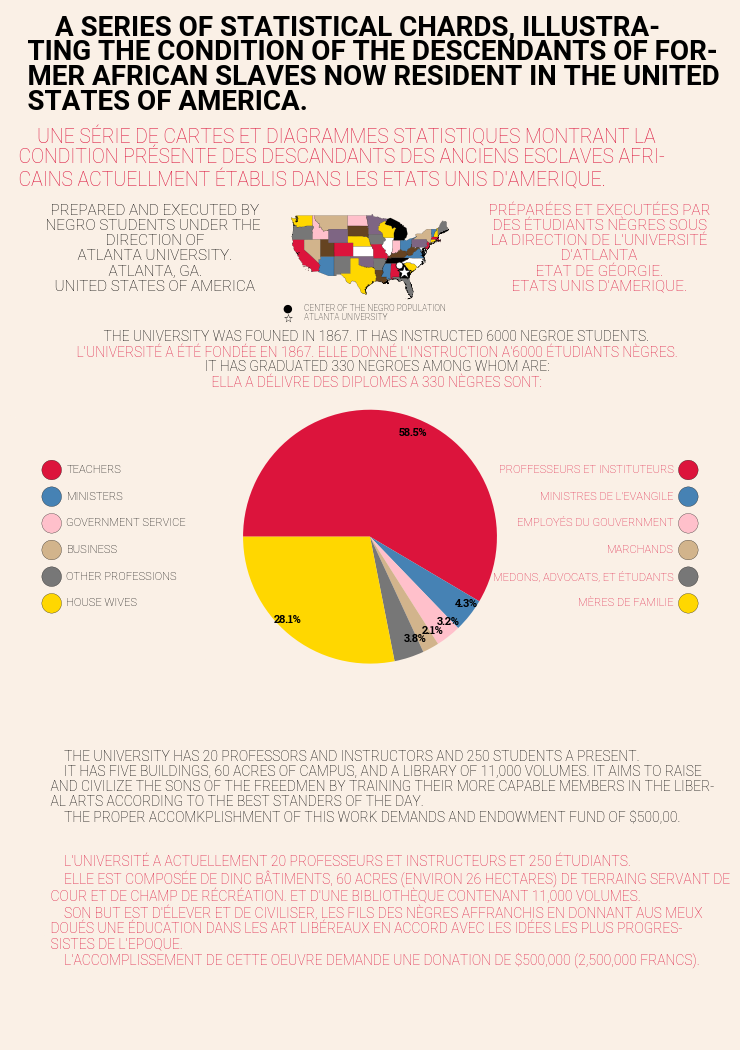

In [66]:
# overall layout
fig, axs = plt.subplots(
    ncols=3,
    nrows=2,
    figsize=(7.4,10.5),
    gridspec_kw={
        'width_ratios': [1,3,1],
        'height_ratios': [1,2],
#         'wspace': -1,
        'hspace': 1
    },
    facecolor=dubois_colors.get('bg')
)

plt.subplots_adjust(bottom=.4, top=.8, left=.05, right=.95)

# turn off axes
for row in axs:
    for ax in row:
        ax.axis('off')

# pie chart
pie_labels = []

for percentage in df['Percentage']:
    pie_labels.append(f'{str(percentage)}%')
    
ax_pie = axs[1][1]
ax_pie.pie(
    df['Percentage'], colors=df['colors'], counterclock=False, startangle=-180, radius=1.7, 
#     edgecolor='black', lw=.5,
    labels=pie_labels,
    labeldistance=.85,
    textprops={
        'fontname': 'Roboto Slab',
        'fontweight': 'bold',
        'fontsize': 8,
    }
)


# map chart
ax_map = axs[0][1]
gdf.plot(ax=ax_map, color=gdf['original_colors'], edgecolor='black', lw=.1)

# plot legends using scatter plots:
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light', 'fontsize': 8}

ax_left = axs[1][0]
ax_right = axs[1][2]

for index, value in enumerate(df['Occupation']):
    ha = 'left'
        
    ax_left.text(
        x=1,
        y=index,
        s=value.upper(),
        va='center',
        ha=ha,
        **rob_font_light
    )
    
    # french
    ha = 'right'
    
    ax_right.text(
        x=5,
        y=index,
        s=df['Occupation_fr'][index].upper(),
        va='center',
        ha=ha,
        color=dubois_colors.get('crimson'),
        **rob_font_light
    )

ax_left.scatter([0,0,0,0,0,0], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_left.set_ylim(6,-1)
ax_left.set_xlim(-1, 7)

ax_right.scatter([6,6,6,6,6,6], df.index.values, color=df['colors'], edgecolor=dubois_colors.get('black'), lw=.2, s=200)
ax_right.set_ylim(6,-1)
ax_right.set_xlim(-1, 7)


    
plot_font_settings_black =  {
    'fontname':'Roboto', 
    'fontweight': 'bold', 
    'fontsize': 20,
    'linespacing': .9,
    'ha': 'left',
    'va': 'top',
    'color': 'black',
    'transform': fig.transFigure,
}  

plot_font_settings_light_black =  {
    'fontname':'Roboto', 
    'fontweight': 'light', 
    'linespacing': 1.1,
    'ha': 'left',
    'va': 'top',
    'color': 'black',
    'transform': fig.transFigure,
}  

plot_font_settings_light_crimson =  {
    'fontname':'Roboto', 
    'fontweight': 'light', 
    'linespacing': 1.1,
    'ha': 'left',
    'va': 'top',
    'color': dubois_colors.get('crimson'),
    'transform': fig.transFigure,
}  



plt.text(
    0, 
    1.01,
    s='''
        A SERIES OF STATISTICAL CHARDS, ILLUSTRA-
    TING THE CONDITION OF THE DESCENDANTS OF FOR-
    MER AFRICAN SLAVES NOW RESIDENT IN THE UNITED
    STATES OF AMERICA.
    ''',
    **plot_font_settings_black
)

plt.text(
    0, 
    .90,
    s='''
        UNE SÉRIE DE CARTES ET DIAGRAMMES STATISTIQUES MONTRANT LA
    CONDITION PRÉSENTE DES DESCANDANTS DES ANCIENS ESCLAVES AFRI-
    CAINS ACTUELLMENT ÉTABLIS DANS LES ETATS UNIS D'AMERIQUE.
    ''',
    fontsize=14,
    **plot_font_settings_light_crimson
)

plot_font_settings_black['ha'] = 'center'
plot_font_settings_light_black['ha'] = 'center'
plot_font_settings_light_crimson['ha'] = 'center'
plt.text(
    .2, 
    .82,
    s='''
    PREPARED AND EXECUTED BY
    NEGRO STUDENTS UNDER THE 
    DIRECTION OF
    ATLANTA UNIVERSITY.
    ATLANTA, GA.
    UNITED STATES OF AMERICA
    ''',
    fontsize=11,
    **plot_font_settings_light_black
)

plt.text(
    .80, 
    .82,
    s='''
    PRÉPARÉES ET EXECUTÉES PAR
    DES ÉTUDIANTS NÈGRES SOUS
    LA DIRECTION DE L'UNIVERSITÉ
    D'ATLANTA
    ETAT DE GÉORGIE.
    ETATS UNIS D'AMERIQUE.
    ''',
    fontsize=11,
    **plot_font_settings_light_crimson
)

plt.text(
    .5, 
    .7,
    s='''
    THE UNIVERSITY WAS FOUNED IN 1867. IT HAS INSTRUCTED 6000 NEGROE STUDENTS.
    
    IT HAS GRADUATED 330 NEGROES AMONG WHOM ARE:
    ''',
    fontsize=10,
    **plot_font_settings_light_black
)

plt.text(
    .5, 
    .685,
    s='''
    L'UNIVERSITÉ A ÉTÉ FONDÉE EN 1867. ELLE DONNÉ L'INSTRUCTION A'6000 ÉTUDIANTS NÈGRES.
    
    ELLA A DÉLIVRE DES DIPLOMES A 330 NÈGRES SONT:
    ''',
    fontsize=10,
    **plot_font_settings_light_crimson
)

plot_font_settings_light_black['ha'] = 'left'
plot_font_settings_light_crimson['ha'] = 'left'

plt.text(
    .05, 
    .3,
    s='''
        THE UNIVERSITY HAS 20 PROFESSORS AND INSTRUCTORS AND 250 STUDENTS A PRESENT.
        IT HAS FIVE BUILDINGS, 60 ACRES OF CAMPUS, AND A LIBRARY OF 11,000 VOLUMES. IT AIMS TO RAISE
    AND CIVILIZE THE SONS OF THE FREEDMEN BY TRAINING THEIR MORE CAPABLE MEMBERS IN THE LIBER-
    AL ARTS ACCORDING TO THE BEST STANDERS OF THE DAY.
        THE PROPER ACCOMKPLISHMENT OF THIS WORK DEMANDS AND ENDOWMENT FUND OF $500,00.
    ''',
    fontsize=10,
    **plot_font_settings_light_black
)

plt.text(
    .05, 
    .2,
    s='''
        L'UNIVERSITÉ A ACTUELLEMENT 20 PROFESSEURS ET INSTRUCTEURS ET 250 ÉTUDIANTS.
        ELLE EST COMPOSÉE DE DINC BÂTIMENTS, 60 ACRES (ENVIRON 26 HECTARES) DE TERRAING SERVANT DE
    COUR ET DE CHAMP DE RÉCRÉATION. ET D'UNE BIBLIOTHÈQUE CONTENANT 11,000 VOLUMES. 
        SON BUT EST D'ÉLEVER ET DE CIVILISER, LES FILS DES NÈGRES AFFRANCHIS EN DONNANT AUS MEUX
    DOUÉS UNE ÉDUCATION DANS LES ART LIBÉREAUX EN ACCORD AVEC LES IDÉES LES PLUS PROGRES-
    SISTES DE L'EPOQUE. 
        L'ACCOMPLISSEMENT DE CETTE OEUVRE DEMANDE UNE DONATION DE $500,000 (2,500,000 FRANCS).
    ''',
    fontsize=10,
    **plot_font_settings_light_crimson
)

gx, gy = (-83.3378775082368, 32.569669504171166)
axs[0][1].scatter(gx, gy, s=105, facecolor='white', edgecolor='black', marker='*', zorder=10, lw=.5)

cx, cy = (-85.10068088574683, 34.396007921212124)
axs[0][1].scatter(cx, cy, s=25, facecolor='white', edgecolor='black', zorder=10, lw=.5)


plt.text(
    .40, 
    .72,
    s='''
    CENTER OF THE NEGRO POPULATION
    ATLANTA UNIVERSITY
    ''',
    fontsize=6,
    **plot_font_settings_light_black
)

plt.text(
    .38, 
    .72,
    s='''
    ●
     ☆ 
    ''',
    va='top',
    ha='center',
    color='black',
    fontname='Helvetica',
    transform= fig.transFigure,
    fontsize=8,
    linespacing=1,
)

plt.show()

Now this is not a perfect match, but one I'm proud of.

---

At the start of the challenge, this was one that I wasn't looking forward to. But during the challenge, I learned a lot that helped me make this easier. Adding all the text and labels felt like the most work. 